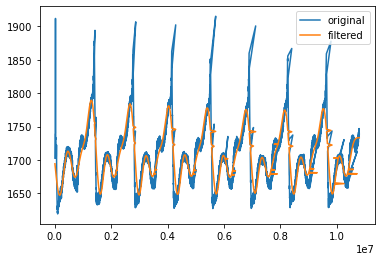

In [2]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import io
import pstats
import cProfile

def task3(): 
    task3 = pd.read_csv('detailTempDownsampled.csv')
    fs =10000
    t=task3["Record ID"][2:3000]
    signala = task3["Auxiliary channel TU1 T(°C)"][2:3000]
    plt.plot(t, signala, label='original')
    fc = 80
    w = fc / (fs / 2) 
    b,a = signal.butter(5, w, 'low')
    output = signal.filtfilt(b,a, signala)
    plt.plot(t, output, label='filtered')
    plt.legend()
    plt.show()
    
def cprofile():
    pr = cProfile.Profile()
    pr.enable()
    my_result = task3()
    pr.disable()
    s = io.StringIO()
    ps = pstats.Stats(pr, stream=s).sort_stats('tottime')
    ps.print_stats()
    with open('cprofile_task3.txt', 'w+') as f:
        f.write(s.getvalue())
        
s=cprofile()

# comment:

The filtered graph follows a repititive pattern.